## HW-2 • Math 189 • Sp 2024
### Due Date: Fri, Apr 26

> NAME: $\color{red}{\text{    Chang Shu     }}$
> 
> PID: $\color{red}{\text{    A16846972     }}$
>
> 

---

## Instructions
* Submit your solutions online on Gradescope
* Look at the detailed instructions [here](https://canvas.ucsd.edu/courses/55191/pages/expectations)


I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

# Question 1

For this question we'll examine the Welch-Satterthwaite approximation for the degrees of freedom in the two-sample t-test, via a simulation study.

<br></br>

> a. Choose the unknown ground truth population parameters of your choice for $\mu_X$, $\mu_Y$, $\sigma_X$, and $\sigma_Y$.

In [167]:
mu_x = 50
mu_y = 55

sigma_x = 10
sigma_y = 15

---

> b. write a function, `generate_data(n, m)`, which outputs two samples $X_1, X_2, \dots, X_n$ and $Y_1, Y_2, \dots, Y_m \sim N(\mu_Y, \sigma_Y^2)$ of size $n$ and $m$ using the parameters you chose in part a. Print the output from one such function call of `generate_data(n=5, m=6)` for $n=5$ and $m=6$.

In [168]:
# write your function here
import scipy.stats as stats
import numpy as np
def generate_data(n, m):
    x = stats.norm.rvs(mu_x, sigma_x, size=n)
    y = stats.norm.rvs(mu_y, sigma_y, size=m)
    return x, y

test_data = generate_data(n=5, m=6)
print(test_data)

(array([49.95466449, 61.90299941, 51.78301954, 53.78652291, 43.61582999]), array([63.55310612, 74.98478146, 54.46507262, 39.74121307, 77.1894366 ,
       41.26589068]))


---

> c. Write a function, `confint_simple(data, alpha)` which takes in the `data` of the two samples $X_1, \cdots, X_n$ and $Y_1, \cdots, Y_m$  from the output of `generate_data(n, m)`  along with a confidence level `alpha` between $0$ and $1$ and returns the $100 \times (1-\alpha)\%$ confidence interval $\textup{CI}(\alpha, \mu_X-\mu_Y)$ for the difference in means of the two samples using the student's t-distribution with $k = \min\{n-1, m-1\}$ degrees of freedom.  Print the output from one such function call of `t_test_1(test_data, alpha=0.05)`.

In [169]:
# write your function here
def confint_simple(data, alpha):
    x, y = data
    n = len(x)
    m = len(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    mu_hat = x_mean - y_mean
    se = np.sqrt(np.std(x, ddof=1)**2/n + np.std(y, ddof=1)**2/m)
    z = stats.t((n-1,m-1)).ppf(1-alpha/2) # t-distribution
    ci = np.array((-1, +1)) * z * se + mu_hat
    return ci
    

interval_simple = confint_simple(test_data, alpha=0.02)
print(interval_simple)

[-33.47480356  18.05744236]


---

> d. Write another functon `confint_welch(data, alpha)` which takes in the `data` of the two samples $X_1, \cdots, X_n$ and $Y_1, \cdots, Y_m$  from the output of `generate_data(n, m)`  along with a confidence level `alpha` between $0$ and $1$ and returns the $100 \times (1-\alpha)\%$ confidence interval $\textup{CI}(\alpha, \mu_X-\mu_Y)$ for the difference in means of the two samples using the Welch-Satterthwaite approximation for the degrees of freedom.  Print the output from one such function call of `t_test_2(test_data, alpha=0.05)`.

As a reminder, the Welch-Satterthwaite approximation for the degrees of freedom is given by

$$
k \approx {\left(\frac{\hat\sigma_X^2}{n} + \frac{\hat\sigma_Y^2}{m}\right)^2} \Bigg/  \Bigg\{\frac{\hat\sigma_X^4}{n^2 \cdot (n-1)} + \frac{\hat\sigma_Y^4}{m^2 \cdot (m-1)}\Bigg\}
$$

where $\hat\sigma_X^2$ and $\hat\sigma_Y^2$ are the sample variances of the two samples.

In [170]:
# write your function here
def confint_welch(data, alpha):
    x, y = data
    n = len(x)
    m = len(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    mu_hat = x_mean - y_mean
    se = np.sqrt(np.std(x, ddof=1)**2/n + np.std(y, ddof=1)**2/m)
    df = (np.std(x, ddof=1)**2/n + np.std(y, ddof=1)**2/m)**2 / ( (np.std(x, ddof=1)**2/n)**2/(n-1) + (np.std(y, ddof=1)**2/m)**2/(m-1) )
    t = stats.t(df).ppf(1-alpha/2)
    ci = np.array((-1, +1)) * t * se + mu_hat
    return ci

interval_welch = confint_welch(test_data, alpha=0.02)
print(interval_welch)

[-28.16868722  15.51940158]


---

> e. Write a function `does_cover(interval, mu_x, mu_y)` which takes a confidence interval and outputs a binary value of 1 if the confidence interval contains the true difference in means `mu_x - mu_y` and 0 otherwise. 

In [171]:
# write your function here
def does_cover(interval, mu_x, mu_y):
    if (interval[0] <= mu_x - mu_y) & ( mu_x - mu_y <= interval[1]):
        return 1
    else:
        return 0

print(does_cover( interval_simple, mu_x, mu_y))
print(does_cover( interval_welch,  mu_x, mu_y))

1
1


---

> f. For $n=5$, $m=6$ and `mu_x, mu_y, sigma_x, sigma_y` fixed from the earlier parts, generate data from $N=10,000$ different trials and store the data in an object called `trials`.

> Using `does_cover` compute the **_coverage probability_** of the confidence intervals using `confint_simple` and `confint_welch` from parts **c** and **d** with any fixed value of `alpha` you desire across the trials. Print the coverage probabilities.

In [172]:
N = 10000
n = 5
m = 6
sum_sample = 0
sum_welch = 0
trials_sample = [confint_simple(generate_data(n, m), alpha=0.05) for i in range(N)]
trials_welch = [confint_welch(generate_data(n, m), alpha=0.05) for i in range(N)]
for interval in trials_sample:
    if does_cover(interval, mu_x, mu_y):
        sum_sample+=1
for interval in trials_welch:
    if does_cover(interval, mu_x, mu_y):
        sum_welch+=1
coverage_simple = sum_sample/N
coverage_welch = sum_welch/N
print(coverage_simple)
print(coverage_welch)

0.9728
0.9529


---

> g. Based on the analyes in part **f**, which method do you think is better for constructing confidence intervals for the difference in means of two samples? Explain why.

I think confint_simple is better for constructing confidence intervals for the difference in means of two samples because its coverage probability is higher than that of confint_welch.

---
---
---

# Question 2

For this question you will use the class data from HW-0 to generate insights

For this question, we will use the following dataset from the UCI Machine Learning Repository: [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 


You can download the CSV file and then load the dataset, or, if you're using Python can use the `ucimlrepo` package in Python. 

<br></br>

> a. Load the dataset and display the first 5 rows of the dataset.

In [173]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


---

> b. Create a boxplot of the cholesterol level for each sex in the dataset. Color them differently for each sex. 

<AxesSubplot:xlabel='sex', ylabel='chol'>

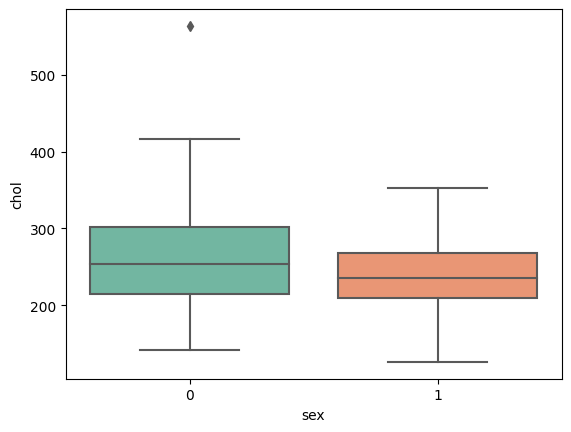

In [174]:
import seaborn as sns
sns.boxplot(data=X, x='sex', y='chol', palette='Set2')

---

> c. Read the description of the dataset and determine which of `MALE` and `FEMALE` the variable values `sex=1` vs `sex=0` correspond to.

1 represents for male and 0 represents for female.

---

> d. Using your answer from part c, which of the two sexes has a higher median cholesterol level? Is there reason to believe that there is a difference in the cholesterol levels between the two sexes? Explain your answer

Female has a higher median cholesterol level. The median which is the middle line inside each box for females is visibly higher than that for males. The interquartile range also appears different between the sexes, with females having a larger spread in cholesterol levels. Both suggests that there's a difference in the cholesterol levels but statistical tests would be required to conclude whether this difference is statistically significant.

---

> e. What is an appropriate hypothesis test to determine if there is a difference in the cholesterol levels between Males and Females?

Two sample t test

---

> f. Fill in the table below to summarize the key components of the hypothesis test you chose in part e.

% # %load tex-macros
<div hidden>
\newcommand{\require}[1]{}

$\require{begingroup}\require{newcommand}$
$\long\def \forcecommand #1{\providecommand{#1}{}\renewcommand{#1}}$
$\forcecommand{\defeq}{\stackrel{\small\bullet}{=}}$
$\forcecommand{\ra}{\rangle}$
$\forcecommand{\la}{\langle}$
$\forcecommand{\pr}{{\mathbb P}}$
$\forcecommand{\qr}{{\mathbb Q}}$
$\forcecommand{\xv}{{\boldsymbol{x}}}$
$\forcecommand{\av}{{\boldsymbol{a}}}$
$\forcecommand{\bv}{{\boldsymbol{b}}}$
$\forcecommand{\cv}{{\boldsymbol{c}}}$
$\forcecommand{\dv}{{\boldsymbol{d}}}$
$\forcecommand{\ev}{{\boldsymbol{e}}}$
$\forcecommand{\fv}{{\boldsymbol{f}}}$
$\forcecommand{\gv}{{\boldsymbol{g}}}$
$\forcecommand{\hv}{{\boldsymbol{h}}}$
$\forcecommand{\nv}{{\boldsymbol{n}}}$
$\forcecommand{\sv}{{\boldsymbol{s}}}$
$\forcecommand{\tv}{{\boldsymbol{t}}}$
$\forcecommand{\uv}{{\boldsymbol{u}}}$
$\forcecommand{\vv}{{\boldsymbol{v}}}$
$\forcecommand{\wv}{{\boldsymbol{w}}}$
$\forcecommand{\zerov}{{\mathbf{0}}}$
$\forcecommand{\onev}{{\mathbf{0}}}$
$\forcecommand{\phiv}{{\boldsymbol{\phi}}}$
$\forcecommand{\cc}{{\check{C}}}$
$\forcecommand{\xv}{{\boldsymbol{x}}}$
$\forcecommand{\Xv}{{\boldsymbol{X}\!}}$
$\forcecommand{\yv}{{\boldsymbol{y}}}$
$\forcecommand{\Yv}{{\boldsymbol{Y}}}$
$\forcecommand{\zv}{{\boldsymbol{z}}}$
$\forcecommand{\Zv}{{\boldsymbol{Z}}}$
$\forcecommand{\Iv}{{\boldsymbol{I}}}$
$\forcecommand{\Jv}{{\boldsymbol{J}}}$
$\forcecommand{\Cv}{{\boldsymbol{C}}}$
$\forcecommand{\Ev}{{\boldsymbol{E}}}$
$\forcecommand{\Fv}{{\boldsymbol{F}}}$
$\forcecommand{\Gv}{{\boldsymbol{G}}}$
$\forcecommand{\Hv}{{\boldsymbol{H}}}$
$\forcecommand{\alphav}{{\boldsymbol{\alpha}}}$
$\forcecommand{\epsilonv}{{\boldsymbol{\epsilon}}}$
$\forcecommand{\betav}{{\boldsymbol{\beta}}}$
$\forcecommand{\deltav}{{\boldsymbol{\delta}}}$
$\forcecommand{\gammav}{{\boldsymbol{\gamma}}}$
$\forcecommand{\etav}{{\boldsymbol{\eta}}}$
$\forcecommand{\piv}{{\boldsymbol{\pi}}}$
$\forcecommand{\thetav}{{\boldsymbol{\theta}}}$
$\forcecommand{\tauv}{{\boldsymbol{\tau}}}$
$\forcecommand{\muv}{{\boldsymbol{\mu}}}$
$%$
$\forcecommand{\sd}{\text{SD}}$
$\forcecommand{\se}{\text{SE}}$
$\forcecommand{\med}{\text{median}}$
$\forcecommand{\median}{\text{median}}$
$%$
$\forcecommand{\supp}{\text{supp}}$
$\forcecommand{\E}{\mathbb{E}}$
$\forcecommand{\var}{\text{Var}}$
$\forcecommand{\Ber}{{\text{Ber}}}$
$\forcecommand{\Bin}{{\text{Bin}}}$
$\forcecommand{\Geo}{{\text{Geo}}}$
$\forcecommand{\Unif}{{\text{Unif}}}$
$\forcecommand{\Poi}{{\text{Poi}}}$
$\forcecommand{\Exp}{{\text{Exp}}}$
$\forcecommand{\Chisq}{{\chi^2}}$
$\forcecommand{\N}{\mathbb{N}}$
$\forcecommand{\iid}{{\stackrel{iid}{\sim}}}$
$\forcecommand{\px}{p_{X}}$
$\forcecommand{\fx}{f_{X}}$
$\forcecommand{\Fx}{F_{X}}$
$\forcecommand{\py}{p_{Y}}$
$\forcecommand{\pxy}{p_{X,Y}}$
$\forcecommand{\po}{{p_0}}$
$\forcecommand{\pa}{{p_a}}$
$\forcecommand{\Xbar}{\overline{X}}$
$\forcecommand{\Ybar}{\overline{Y}}$
$\forcecommand{\Zbar}{\overline{Z}}$
$\forcecommand{\nXbar}{n \cdot \overline{X}}$
$\forcecommand{\nYbar}{n \cdot \overline{Y}}$
$\forcecommand{\nZbar}{n \cdot \overline{Z}}$
$\forcecommand{\Xn}{X_1, X_2, \dots, X_n}$
$\forcecommand{\Xm}{{X_1, X_2, \dots, X_m}}$
$\forcecommand{\Yn}{Y_1, Y_2, \dots, Y_n}$
$\forcecommand{\Ym}{{Y_1, Y_2, \dots, Y_m}}$
$\forcecommand{\sumXn}{X_1 + X_2 + \dots + X_n}$
$\forcecommand{\sumym}{Y_1 + Y_2 + \dots + Y_m}$
$\forcecommand{\la}{\ell_\alpha}$
$\forcecommand{\ua}{u_\alpha}$
$\forcecommand{\at}{{\alpha/2}}$
$\forcecommand{\mux}{\mu_{X}}$
$\forcecommand{\muy}{\mu_{Y}}$
$\forcecommand{\sx}{\sigma_{X}}$
$\forcecommand{\sy}{\sigma_{Y}}$
$\forcecommand{\ci}{\text{CI}}$
$\forcecommand{\pvalue}{$p$-value}$
$\forcecommand{\Ho}{H_{0}}$
$\forcecommand{\Ha}{H_{a}}$

\vskip-\parskip
\vskip-\baselineskip
</div>

| Anatomy of the hypothesis test |  Answer  |
|:------------------------------:|:--------:|
| Assumption                     | $ \Xn \sim N(\mu_X, \sigma_X^2) $ and $ \Ym \sim N(\mu_Y, \sigma_Y^2) $ |
| Population parameter           | $\theta = \mu_X - \mu_Y$ |
| Sample statistic               | $\hat\theta = \hat\mu_X-\hat\mu_Y$ |
| Test statistic                 | $\frac{\hat\theta-\theta}{\sqrt{\frac{\hat{\sigma}_X^2}{n} + \frac{\hat{\sigma}_Y^2}{m}}}$ |
| Null hypothesis                | $H_0: \theta=0$ |
| Alternate hypothesis           | $H_\alpha:\theta \neq 0$ |
| Rejection region shape         | $(-\infty,-x_\alpha) \cup (x_\alpha, \infty)$ |

---

> g. Perform the hypothesis test you chose in part e. Report the p-value. 

(_You can use a built-in function from any package of your choice, e.g., `statsmodels`, or you can write your own function_)

In [175]:
T, pvalue = stats.ttest_ind(
    X[X['sex'] == 0]['chol'], 
    X[X['sex'] == 1]['chol'], 
    equal_var=False,
    alternative='two-sided'
)
print(pvalue)

0.0026305211216072267


> h. State your conclusion at the $\alpha=$ 1% significance level.

In [1]:
alpha = 0.01
print(f'reject H0') if pvalue < alpha else print(f'fail to reject H0')

NameError: name 'pvalue' is not defined

Since pvalue is less than 1%, we reject the null hypothesis. There's a difference in cholesterol levels between males and females.

---

> i. Compute the 99% confidence interval for the difference in the mean cholesterol levels between the females and males. 

(_You can use a built-in function from any package of your choice, e.g., `statsmodels`, or you can write your own function_)

In [177]:
chol_female = X[X['sex'] == 0]['chol']
chol_male = X[X['sex'] == 1]['chol']

def CI_2mean(x_f, x_m, alpha, method='t'):
    n, m = len(x_f), len(x_m)
    mu_hat = np.mean(x_f) - np.mean(x_m)
    se = np.sqrt(np.std(x_f, ddof=1)**2 / n + np.std(x_m, ddof=1)**2 / m)
    q_alpha_by_2 = stats.t((n-1, m-1)).ppf(1-alpha/2) if method == 't' else stats.norm(0, 1).ppf(1-alpha/2)
    ci = np.array((-1, +1)) * q_alpha_by_2 * se + mu_hat
    return ci

CI_2mean(chol_female, chol_male, alpha=0.01)

array([ 3.15350152, 40.9454258 ])

---
---
---

# Question 3

For this question, we are going to use the `adult` dataset available [here](https://archive.ics.uci.edu/ml/datasets/adult).

> a. Load the dataset and display the first 5 rows of the dataset.

In [178]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
df_adult = adult.data.features 
df_adult.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


---

> b. Filter the `df` DataFrame to only keep the rows where the `education` is in `['HS-Grad', 'Bachelors', 'Masters', 'Doctorate']` and display the first 5 rows of the filtered dataset. Rename this to be ``df_filtered`.

In [179]:
import pandas as pd
desired_education = ['HS-grad', 'Bachelors', 'Masters', 'Doctorate']
df_filtered =  df_adult[df_adult['education'].isin(desired_education)]
df_filtered.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


---

> c. Create a table `O_table` of the observed counts for the `sex` (rows) vs. `education` (columns) in the `df_filtered` DataFrame.

In [180]:
O_table = pd.crosstab(index=df_filtered['sex'], columns=df_filtered['education'])
O_table

education,Bachelors,Doctorate,HS-grad,Masters
sex,,,,
Female,2477,113,5097,845
Male,5548,481,10687,1812


---

> d. Create `p_table` as the table of observed proportions for the `education` for each `sex` using the `O_table` from part c.

In [181]:
p_table = O_table.div(O_table.sum(axis=1), axis=0)
p_table

education,Bachelors,Doctorate,HS-grad,Masters
sex,,,,
Female,0.290319,0.013244,0.597398,0.099039
Male,0.299439,0.025961,0.576803,0.097798


---

> e. Create a new row in the `p_table` that contains the cumulative proportions of the `education` for the entire dataset. 

In [182]:
column_totals = p_table.sum(axis=0)
cumulative_counts = np.cumsum(column_totals)
grand_total = column_totals.sum()
p_table.loc['total'] = cumulative_counts/grand_total 
p_table

education,Bachelors,Doctorate,HS-grad,Masters
sex,,,,
Female,0.290319,0.013244,0.597398,0.099039
Male,0.299439,0.025961,0.576803,0.097798
total,0.294879,0.314481,0.901582,1.000000


---

> f. What sort of a hypothesis test would you use to determine if there is a difference between the observed proportions of `education` for each `sex`?

Test for homogeneity

---

> g. Fill in the following table describing the anatomy of the hypothesis test.

Here $X_1$ and $X_2$ denote the Multinomial random variables representing the observed counts for the `education` categories corresponding to Females and Males, respectively.

| Anatomy of the hypothesis test |  Answer  |
|:------------------------------:|:--------:|
| Assumption                     | $$X_1 \sim \text{Mult}(p_{11}, p_{12}, p_{13}, p_{14}), \quad\text{and}\quad X_2 \sim \text{Mult}(p_{21}, p_{22}, p_{23}, p_{24})$$ |
| Population parameter           | $\theta = (p_{11}, p_{12}, p_{13}, p_{14}, \quad \quad p_{21}, p_{22}, p_{23}, p_{24}, \quad \quad p_1, p_2)$ |
| Sample statistic               | $X_1: \hat{p}_{11} = {O_{11}}/{n_1}, \hat{p}_{12} = {O_{12}}/{n_1}, \hat{p}_{13} = {O_{13}}/{n_1}, \hat{p}_{14} = {O_{14}}/{n_1}\\X_2: \hat{p}_{21} = {O_{21}}/{n_2}, \hat{p}_{22} = {O_{22}}/{n_2}, \hat{p}_{23} = {O_{23}}/{n_2}, \hat{p}_{24} = {O_{24}}/{n_2}$ |
| Null hypothesis                | $H_0$: The observed proportions are consistent with each other. |
| Alternate hypothesis           | $H_a$: The observed proportions are not consistent with each other proportions |
| Rejection region shape         | ($x_\alpha$, $\infty$)    where $x_\alpha = \chi^2_{k-1, \alpha}$ |

---

> h. Write down the test statistic $T$ for the hypothesis test in parts f and g. What is its distribution under the null hypothesis?

$$
\displaystyle T = \sum_{i=1}^r n_i \times \Bigg(\sum_{j=1}^k \frac{(\hat p_{ij} - \hat p_{j})^2}{\hat p_{j}}\Bigg) \sim \Chisq_{(r-1) \times (k-1)}
$$

---

> i. Compute the observed test statistic using the formula from part h and the data you created in part e.

In [183]:
row_totals = O_table.sum(axis=1)
column_totals = O_table.sum(axis=0)
final = O_table.values.sum()

expected_rows = []

for row_index in O_table.index:
    expected_row = (row_totals[row_index] * column_totals) / final
    expected_rows.append(expected_row)

expected_frequencies = pd.DataFrame(expected_rows, index=O_table.index, columns=O_table.columns)

test_statistic = ((O_table - expected_frequencies)**2 / expected_frequencies).values.sum()

print("Observed test statistic:", test_statistic)

Observed test statistic: 49.01345790925244


In [184]:
column_totals

education
Bachelors     8025
Doctorate      594
HS-grad      15784
Masters       2657
dtype: int64

---

> j. Compute the p-value of associated with the observed test statistic from part i.

In [1]:
T = stats.chi2_contingency(O_table)
dof = (2-1)*(4-1)
p_value = stats.chi2.sf(T[0], dof) 
p_value

NameError: name 'stats' is not defined

---

> k. State your conclusion at the $\alpha=$ 2.5% significance level.

Since the pvalue is smaller than 2.5%, we conclude to reject the null hypothesis. The proportion are not consistent with each other proportions.

---
---
---